In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("bank_notes.csv")

In [ ]:
df.head()

In [4]:
df.shape

(1372, 5)

In [ ]:
df.info()

In [6]:
df["Target"].value_counts()

0    762
1    610
Name: Target, dtype: int64

In [ ]:
sns.countplot(x="Target", data=df)

In [ ]:
sns.pairplot(data=df, hue="Target")

In [9]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [13]:
y_pred = rf_model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9745454545454545

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       159
           1       0.95      0.99      0.97       116

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



In [16]:
cm = confusion_matrix(y_test, y_pred)

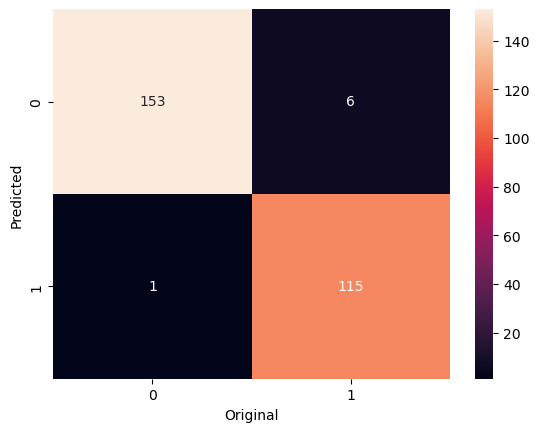

In [18]:
plt.figure()
sns.heatmap(cm, annot=True, fmt=".0f")
plt.ylabel("Predicted")
plt.xlabel("Original")
plt.show()

In [19]:
pickle.dump(rf_model, open("rf.pkl", "wb"))